** убрать все внешние картинки **

** для всего кода прямо над клеткой ставить формулы**

# Линейная регрессия

## Почему мы изучаем ее, а не глубокие нейронные сети?

В данном уроке мы изучим основные концепции и идеи, которые широко применяются в машинном обучении. Линейная регрессия достаточно простая для понимания, и она до сих пор применяется во многих задачах.

** Добавить больше зачем они нужны и где применяеются сейчас. Хотя бы эксель и ClickHouse.**

** Рассказать что есть из коробки. Но важно понимать инструмент. **

** Расказать про sklearn **

## Постановка задачи

Представим, что мы хотим определить цену в одном доме квартиры на основании площади квартиры. 
У нас есть база данных полученная от риэлтерской компании. 
В данном случае нам нужно найти зависимость между площадью квартиры и ценой квартиры. 

То есть, нужно найти функцию $f(X) = y$, где $X$ это площадь квартиры, а $y$ это цена на квартиру. Это и есть задача регрессии.


Пример: 
*Нам говорят, у квартиры площадь 45 квадратных метров. Мы берем это значение, помещаем в нашу функцию и получаем значение.* 

$f(45) = 10 000 000$

*И мы говорим в ответ: она будет стоит 10 млн рублей.*

** Больше про функции **

**Другой пример регрессии.** У нас есть интернет сайт и мы хотим предсказать сколько посититлей у нас будет в в определенное время, при этом у нас есть статистика посещений сайта от времени. Наша задача - используя имеющиеся данные о загруженности в прошлом, предсказать количество поситителей в интересующиее нас время. То есть по имеющимся данным построить зависимость интересующией нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

Рассмотрим подробнее пример с ценами на квартиру.
Давайте загрузим. После этого в вектре $X$ у нас будет площадь квартиры в $м^2$, а в вектре $y$ цена на квартиру. 

** Добавить bias к данным и уменьшить таргет на миллион, что бы уменшить числа **

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

** Чуть больше показать данные **

In [3]:
visualize_X(X)    

   Площадь квартиры
0                27
1                34
2                36
3                42
4                50
5                51
6                53
7                66


In [4]:
visualize_y(y)

   Цена квартиры
0      5000000.0
1      7500000.0
2      5500000.0
3      6600000.0
4     10500000.0
5      9500000.0
6      9900000.0
7     12000000.0


Давайте посмотрим на данные

In [5]:
print(X)

[27 34 36 42 50 51 53 66]


$X_i$ в тексте - это ***X[i]*** в коде.

In [6]:
print(X[0])

27


In [7]:
print(y)

[ 6000000.  8500000.  6500000.  7600000. 11500000. 10500000. 10900000.
 13000000.]


Отобразим эти точки на графике

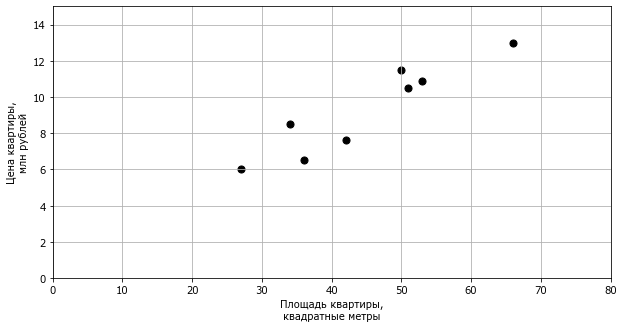

In [8]:
plot_data(X, y)      # Строим диаграму с точками

Видим, что чем больше площадь квартиры, тем выше ее цена. Можно сделать вывод, что между этими данными есть зависимость.

Допустим мы предполагаем, что данная зависимость может описаться линейной функцией вида $y = kX$, где $X$ это площадь квартиры, а $y$ ее цена, $k$ - коэффициент который мы попытаемся подобрать.

Мы предполагаем, что данную зависимость можно описать такой функцией, это наша гипотеза. 
Давайте нанесем на график несколько линейных функций с разным коэффициентом что бы убедится, что такой вид функции подходит.

In [12]:
choose_slope(X, y)

interactive(children=(IntSlider(value=170000, description='k', max=220000, min=150000, step=2000), Output()), …

Реализуем эту функцию.

** Начать с реализации с фором.**

In [13]:
def f(X, k):
    return k*X

print(f(X=X, k=100000))

[2700000 3400000 3600000 4200000 5000000 5100000 5300000 6600000]


## Функция ошибки

У нас есть гипотезы. Но как численно определить какая из них лучшая?

Для это введем функцию ошибку, также известную как функцию потерь. Функция ошибки - численное значение того, как наша гипотеза хорошо моделирует функцию. Обозначается функция потерь как $Loss$, $L$ или $J$. 

** Объяснить что L - это правдоподобие и лучше не занимать что есть **

** Каждая формула на отдельной строке **

Пусть у нас есть функция (наша модель)  $\hat{y} = f(X) = kX$. То есть, $\hat{y}$ является предсказанными нами значениями для $X$. А настоящие значения будут равны $y$. Тогда ошибку нашего предсказания на $i$-ом примере можно посчитать, как: $\hat{y_i} - y_i$. Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль либо квадрат ошибки. Для начала давайте возьмем квадрат. Тогда ошибка $j(k)$ на i-ом примере будет равна $j(k) = (\hat{y_i} - y_i)^2 = (kX_i - y_i)^2$

In [15]:
plot_data_and_error(X, y)

interactive(children=(IntSlider(value=170000, description='k', max=220000, min=150000, step=2000), Output()), …

In [16]:
k = 200000
for i in range(X.shape[0]): 
    diff = f(X[i], k) - y[i]
    print(f"Разница на сэмпле {i} равна {diff}")

Разница на сэмпле 0 равна -600000.0
Разница на сэмпле 1 равна -1700000.0
Разница на сэмпле 2 равна 700000.0
Разница на сэмпле 3 равна 800000.0
Разница на сэмпле 4 равна -1500000.0
Разница на сэмпле 5 равна -300000.0
Разница на сэмпле 6 равна -300000.0
Разница на сэмпле 7 равна 200000.0


In [17]:
k = 200000
for i in range(X.shape[0]): 
    diff_quad = (f(X[i], k) - y[i])**2
    print(f"Квадрат разницы на сэмпле {i} равен {diff_quad}")

Квадрат разницы на сэмпле 0 равен 360000000000.0
Квадрат разницы на сэмпле 1 равен 2890000000000.0
Квадрат разницы на сэмпле 2 равен 490000000000.0
Квадрат разницы на сэмпле 3 равен 640000000000.0
Квадрат разницы на сэмпле 4 равен 2250000000000.0
Квадрат разницы на сэмпле 5 равен 90000000000.0
Квадрат разницы на сэмпле 6 равен 90000000000.0
Квадрат разницы на сэмпле 7 равен 40000000000.0


Но это на одном примере. А на всех?

**Разбить формулы **

Тогда мы можем посчитать суммарную ошибку $J(k)$ на всех примерах:

$J(k) = \frac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2} = \frac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это количество квартир, $X_i$ - это площадь i-oй квартиры, $y_i$ - цена для i-oй квартиры, $\hat{y_i}$ - предсказанная цена для i-oй квартиры.

***Немного про нотацию*** 

Функция потерь формально зависит от входных данных, реальных выходных данных, вида функции и параметров этой функции. 

То есть, $J(X, y, f, k)$. Но обычно, для краткости, мы предполагаем, что мы используем текущие X, y и f и пишем, что функция потерь зависит только от параметров функции.

Давайте визуализируем ошибки для наших гипотез.

** Подробнее по строчкам **

In [18]:
# реализация функции ошибки

def loss_function(k, X, y):
    
    N = X.shape[0]       # получаем размер вектора столбца
    # или N = len(X)
   
    J = np.sum((k*X - y)**2)/N
    # или J = np.mean((k*X - y)**2)
    return J

k = 170000
print(loss_function(k, X, y) / 1e12)

3.6039875


In [19]:
plot_data_and_J(X, y)

interactive(children=(IntSlider(value=170000, description='k', max=220000, min=150000, step=2000), Output()), …

Давайте теперь визуализируем всю функцию ошибки для всех функция значений $k$.

**Объяснить что это не аналитическая форма. Расказать что это  создано фором и можно сделать только для данного случая **

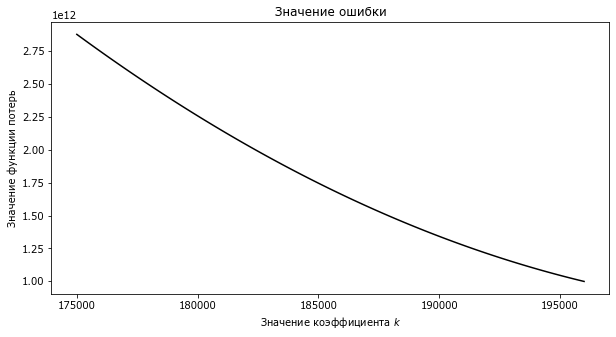

In [20]:
plot_all_J(X, y)

## Производная

Наша задачи - это минимизации функции ошибки. 
Я думаю, что вы знаете как можно найти значение минимума для данной функции. Нужно взять производную функции ошибки и приравнять ее к нулю. $J'(k) = \frac{dJ(k)}{dk} = 0$.

** Доходчиво разъяснить почему это невозможно сделать всегда**

** Сделать либо гифку либо по слайдеру**

В данном случае для какой-то точки $x_0$ производную можно рассматривать $f'(x_0) = \frac{d f(x_0)}{dx} = \frac{f(x_0+\Delta x) - f(x_0)}{\Delta x}, \Delta x \rightarrow 0$ 

<img src="img/der.png" alt="Drawing" style="width: 500px;"/>

Можно считать, что производная в точке показывает "скорость" изменения функции. Она положительна если функция растет и отрицательно, когда убывает.

Еще ее можно интерпретировать как угол наклона $\alpha$ касательной.

Обычно пишут что $f'(x) = tg(\alpha)$.

Точках перегиба, производная равна 0. А точки перегиба - это когда функция принимает максимальные и минимальные значения.

При взятии производной сложной функции использоваться chain rule:

**Chain рул нужно расписать до интуции **

$u = \phi(x)$

$y= f(u)$

$\frac{dy}{dx} = \frac{df(u)}{du} \cdot \frac{du(x)}{dx}$

Производная суммы/разности равна сумме/разности производных:

** Расписать все правила и добавить примеры произоводных для этих правил  **

$(f_1(x) + f_2(x))' = f_1'(x) + f_2'(x)$

### Пример 1 ###

$y = sin(3x - 5)$

$u = 3x - 5$

$y = sin(u)$

$\frac{dy}{dx} = \frac{d sin(u)}{du} \cdot \frac{d(3x - 5)}{dx}$ 


$\frac{d sin(u)}{du} = cos(u)$

$\frac{d(3x - 5)}{dx} = 3$


$\frac{dy}{dx} = 3cos(3x - 5)$

### Пример 2 ###

$y = (10x^2 + x)^3$

$u = 10x^2 + x$

$y = u^3$

$\frac{dy}{dx} = \frac{d  u^3}{du} \cdot \frac{d(10x^2 + x)}{dx}$ 


$\frac{d  u^3}{du} = 3u^2$

$\frac{d(10x^2 + x)}{dx} = 20x + 1$

$\frac{dy}{dx} = 3u^2 \cdot(20x + 1) = 3(10x^2 + x)^2 \cdot(20x + 1) $

Таким образом, в нашем случае:

$ J'(k) = \frac{dJ(k)}{dk} = \frac{d}{dk}(\frac{1}{N}\sum_{i=1}^{N}{(y_i - \hat{y_i})^2}) 
= 2 \cdot \frac{1}{N}\sum_{i=1}^{N} (kX_i - y_i)\frac{d}{dk}(kX_i - y_i) =
          \frac{1}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 
          
И для нахождения минимума нужно приравнять производную к нулю и решаем уравнение относительно k. 

$ \frac{dJ(k)}{dk} = 0$

Решив уравнение, мы получим значение для $k=185072.4$

In [ ]:
plot_data_and_hyp(X, y, 185072.4)

Но в реальных приложениях не всегда возможно решить это уравнение (далее я расскажу поподробнее о таких ситуациях). 

Поэтому, познакомимся с таким алгоритмом как градиентный спуск. 

Данный алгоритм является одним самых распространенных алгоритмов в машинном обучении.

** показать значение производной в точках со слайдером **

** Полный график производной **

** Показать что производная слишком большая и нельзя так прыгать используя только ее ** 

** Показать что чем больше ошибка, тем больше производная, для MSE **

In [ ]:
plot_all_J_with_der(X, y)

## Градиентный спуск

** переписать менее математично **

** объяснить альфу **

Как вызнаете, значение производной в точке равно значению тангенса угла наклона касательной в данной точке или же показывает растет ли функция или убывает.

Использую эту информацию мы можем понять где находится минимум и изменить значение $k$ в сторону минимума. 

* Если производная положительная (как касательная в точке 190000), то нам нужно уменьшать значение $k$. 
* Если производная отрицательная (как касательная в точке 180000), то нам нужно увеличить значение $k$.  

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Выбираем случайное значение для $k$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \frac{d}{dk} J(k)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$

Где $\alpha$ это коэффициент, который мы выбреем. 

In [ ]:
def gradient_function(k, X, y):
    N = X.shape[0]       
    grad = 2*np.sum((k * X - y) * X) / N                       
    return grad   

k = 170000
print(gradient_function(k, X, y))

In [ ]:
def gradient_descent(k_init, X, y, alpha, iters):
    k = k_init
    for i in range (0, iters):
        k = k - (alpha * gradient_function(k, X, y))
    return k

k_init = 170000 
alpha = 0.0001
iters = 10
gradient_descent(k_init, X, y, alpha, iters)

Аналитически подсчитаный k = 185072.4

Рассмотрим как ведет себя алгоритм с различными $\alpha$

** гифка или слйдер с лучшей визулизацией **

In [ ]:
Traice(X, y)

# Немного усложним пример

В качестве гипотезы мы использовали функцияю вида $f(X) = kX$.

Многие из вас могли заметить, что это не совсем линейная функция. Линейная фунция на самом деле выглядит так:

$f(X) = kX + b$.

Давайте изменим гипотезу и теперь будем использовать "настоящую" линейную функцию.

Но давайте немного изменим обозначения.

In [49]:
import regression_helper

X, y = get_data()

In [50]:
def f(X, k, b):
    return k*X + b

print(f(X=X, k=10, b=-10))

[260 330 350 410 490 500 520 650]


Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$. То есть, $\hat{y}$ является предсказанными нами значениями для $X$. 
А настоящие значения будут равны $y$. 

Тогда ошибка на одном примере равна $j(k, b)$ на i-ом примере будет равна $j(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$

$J(k, b) = \frac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $

То есть теперь у нас ошибка зависит не только от $k$, но и от $b$.

In [51]:
def linearn_loss_function(k, b, X, y):
    
    N = X.shape[0]       # получаем размер вектора столбца
    # или N = len(X)
   
    J = np.sum(((k*X + b) - y)**2)/N
    # или J = np.mean((k*X - y)**2)/N
    return J

k = 170000
print(linearn_loss_function(k=k, b=1000, X=X, y=y) / 1e12)

1.235121


In [54]:
plot_linear_loss_in_3d(X, y)

interactive(children=(IntSlider(value=0, description='Вертикальное', max=180), IntSlider(value=45, description…

## Градиент

Давайте введем понятие градиента.

Градиент фунцкии $\phi(x_0, x_1, \ldots x_N)$ от N переменных это 

N значений: $\frac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \frac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \frac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

По сути - это координаты вектора, со значениями производных по разным осям. 


$\phi(x, y) = z$ 

$grad = \frac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \frac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$


<img src="img/grad.png" alt="Drawing" style="width: 700px;"/>

** добавить рисунок вида сверху и прямо показать стрелки с градинтами для точки**

**Пример градиента от функции двух переменых**

Тогда определим нашу функцию ошибки от параметров $k, b$:

$J(k, b) = \frac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

Для нахождения этих коэффициентов также используем градиентный спуск. Но теперь нам необходимо найти производную от функции ошибки для каждого параметра.

$\frac{\delta  J(k, b)}{\delta b} = \frac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\frac{\delta J(k, b)}{\delta k} = \frac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 


Тогда алгоритм градиентного спуска можно описать следующим образом:

* Выбираем случайное значение для $k$ и $b$
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \frac{\delta }{\delta b} J(k, b)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \frac{\delta }{\delta k} J(k, b)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

Где $\alpha$ это коэффициент, который мы выбираем. 

In [86]:
def gradient_function(k, b, X, y):
    N = X.shape[0]       
    grad_b = 2*np.sum(((k * X + b) - y)) / N                       
    grad_k = 2*np.sum(((k * X + b) - y) * X) / N                       
    return np.array([grad_k, grad_b])

k = 170000
b = 100000
print(gradient_function(k, b, X, y))

[-57407500.  -1167500.]


In [87]:
def gradient_descent(k_init, b_init, X, y, alpha, iters):
    k = k_init
    b = b_init
    for i in range (0, iters):
        gradients = gradient_function(k, b, X, y)
        k = k - (alpha * gradients[0])
        b = b - (alpha * gradients[1])
    return k, b

k_init = 170000 
b_init = 0
alpha = 0.0001
iters = 10
gradient_descent(k_init, b_init, X, y, alpha, iters)

(185366.1109139422, 303.331098831608)

In [98]:
a=0.00001
lin_grad_linear(X, y, alpha=a, iters=50, k_init=500000, b_init=-100)

interactive(children=(IntSlider(value=0, description='Вертикальное', max=90), IntSlider(value=0, description='…

(214065.49560396338, -70722.90807289406)